In [1]:
import pandas as pd

# CSV 파일 읽기
book_file_path = r'org+preptype+repyr+lastyr.csv'
book_df = pd.read_csv(book_file_path)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13892\3443035745.py:5: DtypeWarning: Columns (7,8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  book_df = pd.read_csv(book_file_path)


In [2]:
book_df['등록일자'] = pd.to_datetime(book_df['등록일자'])
book_df['등록년도'] = book_df['등록일자'].dt.year
book_df['year_after_publication'] = book_df['등록년도'] - book_df['대표년도']

In [3]:
# diff 값이 음수인 데이터 필터링
negative_diff_books = book_df[book_df['year_after_publication'] < 0]

# 도서 ID 몇 개 출력
negative_diff_books['도서ID'].head()

# diff 값이 음수인 데이터 개수 확인
negative_diff_count = book_df[book_df['year_after_publication'] < 0].shape[0]
print(f"diff 값이 음수인 도서의 개수: {negative_diff_count}")

# diff 값의 최솟값 구하기
min_diff = book_df['year_after_publication'].min()

# 최솟값을 가진 도서의 정보 출력
min_diff_books = book_df[book_df['year_after_publication'] == min_diff]
print(f"diff 값의 최솟값: {min_diff}")
print("최솟값을 가진 도서명:")
print(min_diff_books[['서명', 'year_after_publication']])

diff 값이 음수인 도서의 개수: 5451
diff 값의 최솟값: -33.0
최솟값을 가진 도서명:
                                                      서명  \
58115          Husserl :an analysis of his phenomenology   
71683  The life of the Buddha :according to the Pali ...   

       year_after_publication  
58115                   -33.0  
71683                   -33.0  


In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: 'Malgun Gothic', Mac: 'AppleGothic', Linux: 'NanumGothic')
plt.rc('font', family='Malgun Gothic')  # Windows 환경

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

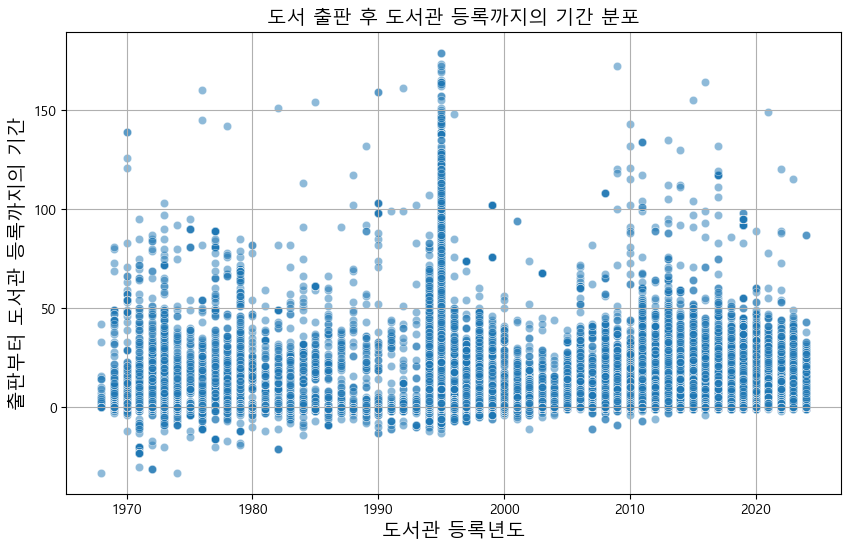

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 산점도 그리기
sns.scatterplot(data=book_df, x='등록년도', y='year_after_publication', alpha=0.5)

# 그래프 꾸미기
plt.xlabel('도서관 등록년도', fontsize=14)
plt.ylabel('출판부터 도서관 등록까지의 기간', fontsize=14)
plt.title('도서 출판 후 도서관 등록까지의 기간 분포', fontsize=14)
plt.grid(True)

plt.savefig('scatterplot.png', dpi=300, bbox_inches='tight')

plt.show()


In [8]:
# diff 값이 50보다 큰 행 필터링
greater_than_50 = book_df[book_df['year_after_publication'] > 50]

# 개수 출력
count_greater_than_50 = greater_than_50.shape[0]
print(f"year_after_publication 값이 50보다 큰 도서의 개수: {count_greater_than_50}")


year_after_publication 값이 50보다 큰 도서의 개수: 3134


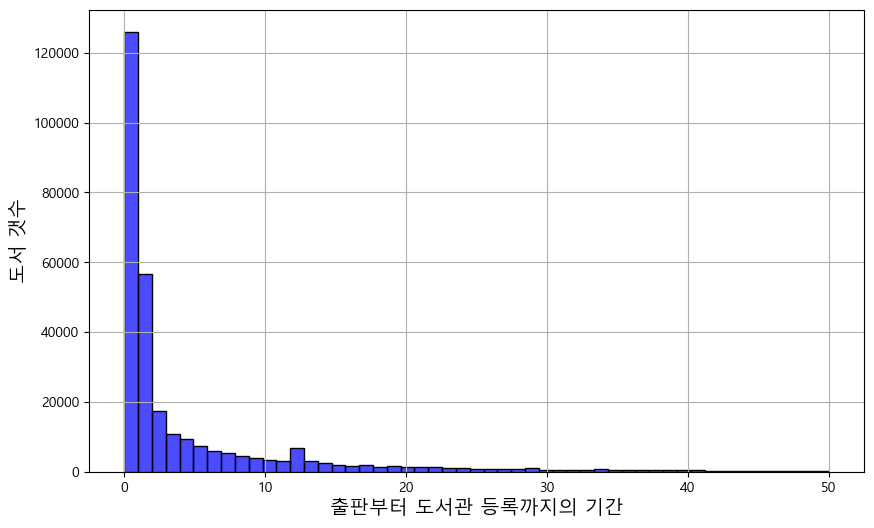

In [14]:
# diff 값이 0부터 50까지인 행 필터링
filtered_df = book_df[(book_df['year_after_publication'] >= 0) & (book_df['year_after_publication'] <= 50)]

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# diff 값들의 히스토그램 그리기
sns.histplot(filtered_df['year_after_publication'], kde=False, bins=51, color='blue', alpha=0.7)

# 그래프 꾸미기
# plt.title('year_after_publication', fontsize=16)
plt.xlabel('출판부터 도서관 등록까지의 기간', fontsize=14)
plt.ylabel('도서 갯수', fontsize=14)
plt.grid(True)

plt.savefig('books.png', dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()


In [12]:
# diff 값이 0부터 10까지인 데이터의 갯수
filtered_0_to_10 = book_df[(book_df['year_after_publication'] >= 0) & (book_df['year_after_publication'] <= 10)].shape[0]

# diff 값이 0부터 2까지인 데이터의 갯수
filtered_0_to_2 = book_df[(book_df['year_after_publication'] >= 0) & (book_df['year_after_publication'] <= 2)].shape[0]

# 전체 데이터의 개수
total_count = book_df.shape[0]

# 음수가 아닌 정상 데이터의 갯수
filtered_normal = book_df[(book_df['year_after_publication'] >= 0) & (book_df['year_after_publication'] <= 50)].shape[0]

# 0 ~ 10 퍼센트 계산
percentage_of_0_to_10 = (filtered_0_to_10 / total_count) * 100
percentage_of_0_to_10_normal = (filtered_0_to_10 / filtered_normal) * 100

# 0 ~ 2 퍼센트 계산
percentage_of_0_to_2 = (filtered_0_to_2 / total_count) * 100
percentage_of_0_to_2_normal = (filtered_0_to_2 / filtered_normal) * 100

# print(f"전체 데이터에서 10년안에 등록된 도서가 차지하는 비율: {percentage_of_0_to_10:.2f}%")
print(f"정상 데이터에서 10년안에 등록된 도서가 차지하는 비율: {percentage_of_0_to_10_normal:.2f}%")
# print(f"전체 데이터에서 2년안에 등록된 도서가 차지하는 비율: {percentage_of_0_to_2:.2f}%")
print(f"정상 데이터에서 2년안에 등록된 도서가 차지하는 비율: {percentage_of_0_to_2_normal:.2f}%")


정상 데이터에서 10년안에 등록된 도서가 차지하는 비율: 86.08%
정상 데이터에서 2년안에 등록된 도서가 차지하는 비율: 68.78%
